### Lam Hong Kevin Ching 1009243043

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=86a3d1e883c619e3b1765371df466742cbb5df61520f9ea128f9487d7e5603f7
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit


In [ ]:
from scipy.stats import kruskal

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
df = pd.read_excel("INF2178_A2_data.xlsx")

### Reviewing Data and Data Cleaning

In [ ]:
df.shape

(1063, 17)

In [ ]:
df.head()

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y


In [ ]:
df_new = df.drop(df.columns[4:7], axis = 1)
df_new

,_id,LOC_ID,LOC_NAME,AUSPICE,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,1059,14492,The Neighbourhood Group Downsview Child Care,Non Profit Agency,Public Elementary School,Downsview Public School,0,0,0,52,60,112,Y,Y
1059,1060,14496,Lawrence Park School,Non Profit Agency,Other,NaN,0,25,35,0,0,60,N,N
1060,1061,14497,The Munchkin Manor Daycare & Early Learning Ce...,Non Profit Agency,Other,Place Of Worship,0,25,24,0,0,49,N,N
1061,1062,14501,Columbus Early Learning Centres - Regina Mundi,Non Profit Agency,Catholic Elementary School,Regina Mundi Catholic School,0,0,0,26,30,56,Y,Y


In [ ]:
df_new.info(), df_new.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _id          1063 non-null   int64 
 1   LOC_ID       1063 non-null   int64 
 2   LOC_NAME     1063 non-null   object
 3   AUSPICE      1063 non-null   object
 4   bldg_type    1063 non-null   object
 5   BLDGNAME     715 non-null    object
 6   IGSPACE      1063 non-null   int64 
 7   TGSPACE      1063 non-null   int64 
 8   PGSPACE      1063 non-null   int64 
 9   KGSPACE      1063 non-null   int64 
 10  SGSPACE      1063 non-null   int64 
 11  TOTSPACE     1063 non-null   int64 
 12  subsidy      1063 non-null   object
 13  cwelcc_flag  1063 non-null   object
dtypes: int64(8), object(6)
memory usage: 116.4+ KB


(None,
 _id              0
 LOC_ID           0
 LOC_NAME         0
 AUSPICE          0
 bldg_type        0
 BLDGNAME       348
 IGSPACE          0
 TGSPACE          0
 PGSPACE          0
 KGSPACE          0
 SGSPACE          0
 TOTSPACE         0
 subsidy          0
 cwelcc_flag      0
 dtype: int64)

In [ ]:
df_clean = df_new.drop(['BLDGNAME'], axis = 1)

In [ ]:
df_clean.info(), df_clean.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _id          1063 non-null   int64 
 1   LOC_ID       1063 non-null   int64 
 2   LOC_NAME     1063 non-null   object
 3   AUSPICE      1063 non-null   object
 4   bldg_type    1063 non-null   object
 5   IGSPACE      1063 non-null   int64 
 6   TGSPACE      1063 non-null   int64 
 7   PGSPACE      1063 non-null   int64 
 8   KGSPACE      1063 non-null   int64 
 9   SGSPACE      1063 non-null   int64 
 10  TOTSPACE     1063 non-null   int64 
 11  subsidy      1063 non-null   object
 12  cwelcc_flag  1063 non-null   object
dtypes: int64(8), object(5)
memory usage: 108.1+ KB


(None,
 _id            0
 LOC_ID         0
 LOC_NAME       0
 AUSPICE        0
 bldg_type      0
 IGSPACE        0
 TGSPACE        0
 PGSPACE        0
 KGSPACE        0
 SGSPACE        0
 TOTSPACE       0
 subsidy        0
 cwelcc_flag    0
 dtype: int64)

### EDA

In [ ]:
print("Summary Statistics:\n", df_clean.describe())

Summary Statistics:
                _id        LOC_ID      IGSPACE      TGSPACE      PGSPACE  \
count  1063.000000   1063.000000  1063.000000  1063.000000  1063.000000   
mean    532.000000   8087.888053     3.896519    11.600188    24.258702   
std     307.005972   5151.252693     6.091782    12.088152    18.577416   
min       1.000000   1013.000000     0.000000     0.000000     0.000000   
25%     266.500000   1862.000000     0.000000     0.000000    16.000000   
50%     532.000000   8826.000000     0.000000    10.000000    24.000000   
75%     797.500000  13245.000000    10.000000    15.000000    32.000000   
max    1063.000000  14504.000000    30.000000    90.000000   144.000000   

           KGSPACE      SGSPACE     TOTSPACE  
count  1063.000000  1063.000000  1063.000000  
mean     14.257761    21.661336    75.674506  
std      20.493290    30.423503    47.816518  
min       0.000000     0.000000     6.000000  
25%       0.000000     0.000000    43.000000  
50%       0.000000   

In [ ]:
df_clean['AUSPICE'].unique()

array(['Non Profit Agency', 'Commercial Agency',
       'Public (City Operated) Agency'], dtype=object)

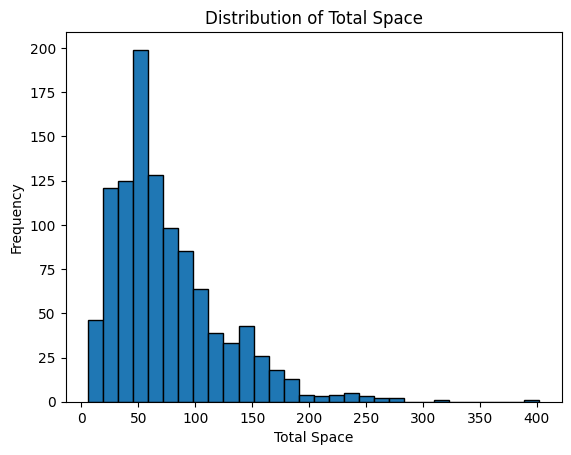

In [ ]:
plt.hist(df_clean['TOTSPACE'], bins=30, edgecolor='black')
plt.title('Distribution of Total Space')
plt.xlabel('Total Space')
plt.ylabel('Frequency')
plt.show()


<Figure size 800x500 with 0 Axes>

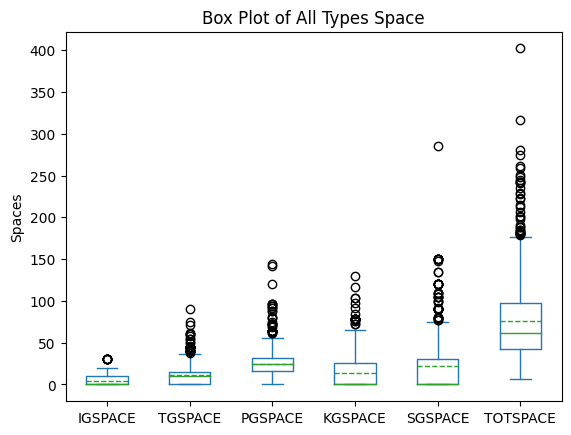

In [ ]:
df_rooms = df_clean[['IGSPACE','TGSPACE','PGSPACE','KGSPACE','SGSPACE', 'TOTSPACE']]
plt.figure(figsize=(8, 5))
df_rooms.plot.box(showmeans = True, meanline = True)
plt.title('Box Plot of All Types Space')
plt.ylabel('Spaces')
plt.show()

### One-Way ANOVA

<Figure size 1200x800 with 0 Axes>

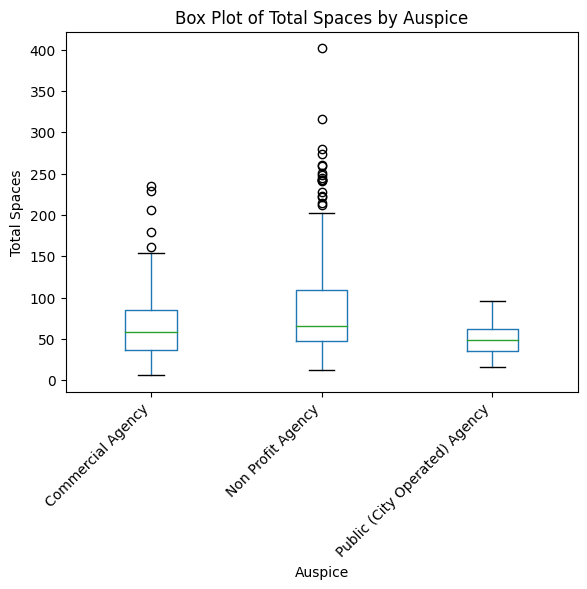

In [ ]:
df_extract = df_clean[['AUSPICE', 'TOTSPACE']]
plt.figure(figsize=(12, 8))
df_extract.boxplot(by='AUSPICE', column=['TOTSPACE'], grid=False)

plt.title('Box Plot of Total Spaces by Auspice')
plt.suptitle('')
plt.xlabel('Auspice')
plt.ylabel('Total Spaces')
plt.xticks(rotation=45, ha='right')

plt.show()


In [ ]:
# Ordinary Least Squares model
model = ols('TOTSPACE~ C(AUSPICE)', data=df_extract).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(AUSPICE),9.611211e+04,2.0,21.843051,5.057716e-10
Residual,2.332065e+06,1060.0,NaN,NaN


In [ ]:
# ANOVA table
res = stat()
res.anova_stat(df=df_extract, res_var='TOTSPACE', anova_model='TOTSPACE~ C(AUSPICE)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,9.611211e+04,48056.057145,21.843051,5.057716e-10
Residual,1060.0,2.332065e+06,2200.061571,NaN,NaN


In [ ]:
#Tukey's HSD
res = stat()
res.tukey_hsd(df=df_extract, res_var='TOTSPACE',xfac_var='AUSPICE', anova_model='TOTSPACE~ C(AUSPICE)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,17.119417,9.703599,24.535235,7.662434,0.001000
1,Non Profit Agency,Public (City Operated) Agency,34.334610,16.224077,52.445142,6.292710,0.001000
2,Commercial Agency,Public (City Operated) Agency,17.215193,-1.453146,35.883531,3.060857,0.077966


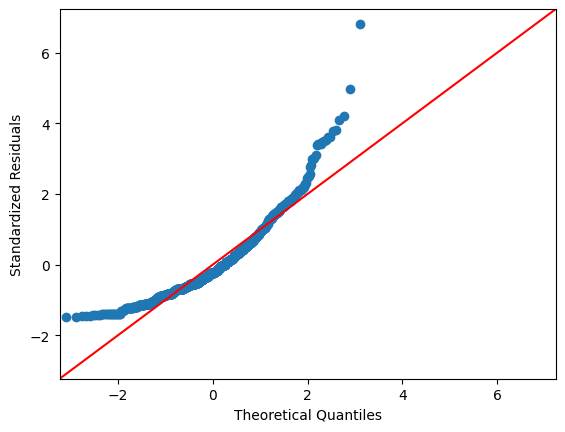

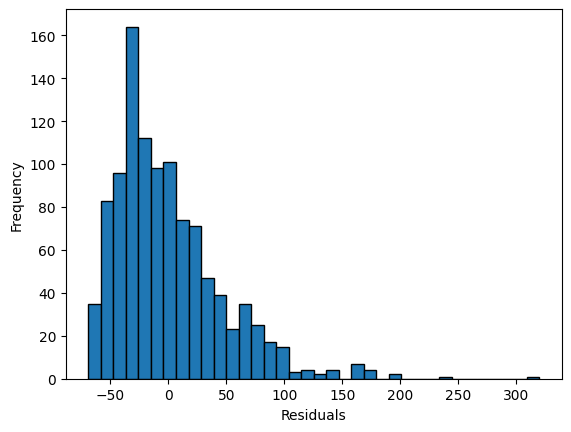

In [ ]:
# Q-Q plots
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [ ]:
#assumption 1: Normality check
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

0.901775598526001 1.4964898448030214e-25


In [ ]:
#assumption 2: Homogeneity of variances check using Levene's test
res.levene(df=df_extract, res_var='TOTSPACE', xfac_var='AUSPICE')
res.levene_summary

,Parameter,Value
0,Test statistics (W),17.9271
1,Degrees of freedom (Df),2.0000
2,p value,0.0000


### Two-way ANOVA

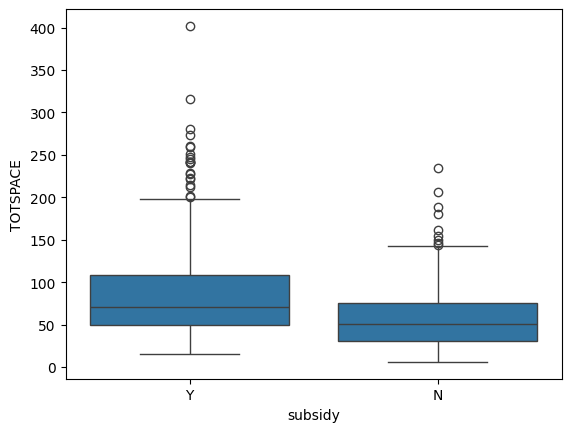

In [ ]:
ax = sns.boxplot(x = 'subsidy', y ='TOTSPACE', data = df_clean)
plt.show()

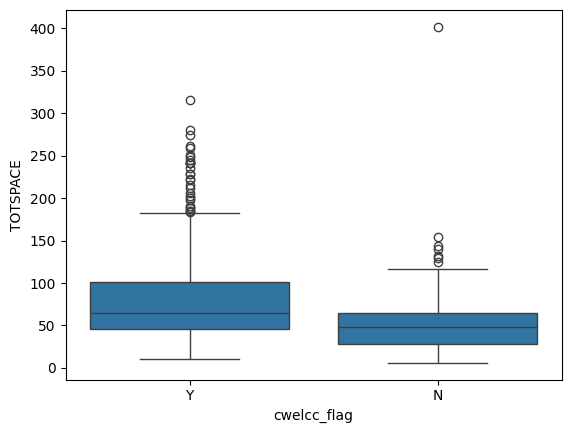

In [ ]:
ax = sns.boxplot(x = 'cwelcc_flag', y ='TOTSPACE', data = df_clean)
plt.show()

In [ ]:
formula = 'TOTSPACE ~ C(subsidy) + C(cwelcc_flag) + C(subsidy):C(cwelcc_flag)'
model = ols(formula, df_clean).fit()
two_aov_table = sm.stats.anova_lm(model, typ=2)
two_aov_table

,sum_sq,df,F,PR(>F)
C(subsidy),9.816181e+04,1.0,46.375040,1.633653e-11
C(cwelcc_flag),6.723429e+03,1.0,3.176381,7.499648e-02
C(subsidy):C(cwelcc_flag),1.910868e+04,1.0,9.027604,2.721895e-03
Residual,2.241580e+06,1059.0,NaN,NaN


In [ ]:
tukey = pairwise_tukeyhsd(endog=df_clean['TOTSPACE'],
                          groups=df['subsidy'],
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     N      Y  26.2658   0.0 20.3236 32.208   True
--------------------------------------------------


In [ ]:
df_clean['interaction'] = df_clean['subsidy'].astype(str) + '-' + df_clean['cwelcc_flag'].astype(str)

#Perform Tukey's HSD test for the interaction between 'subsidy' and 'cwelcc_flag'
tukey = pairwise_tukeyhsd(endog=df_clean['TOTSPACE'],
                          groups=df_clean['interaction'],
                          alpha=0.05)

tukey_results = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
tukey_results

,group1,group2,meandiff,p-adj,lower,upper,reject
0,N-N,N-Y,14.3108,0.0289,1.0280,27.5936,True
1,N-N,Y-N,62.3108,0.0000,27.7991,96.8225,True
2,N-N,Y-Y,34.9374,0.0000,23.4093,46.4656,True
3,N-Y,Y-N,48.0000,0.0015,14.2146,81.7854,True
4,N-Y,Y-Y,20.6266,0.0000,11.5001,29.7531,True
5,Y-N,Y-Y,-27.3734,0.1456,-60.5082,5.7614,False


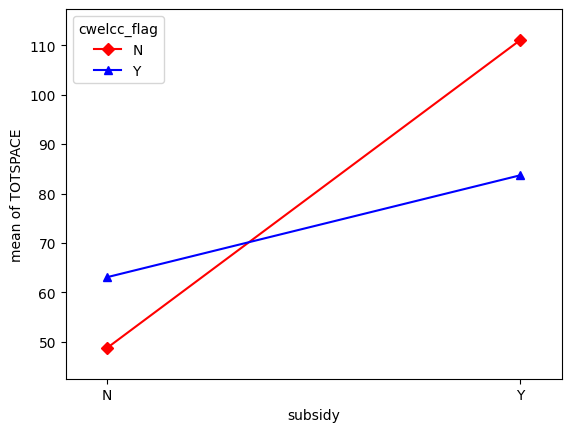

In [ ]:
fig = interaction_plot(df_clean.subsidy, df_clean.cwelcc_flag, df.TOTSPACE, colors=['red','blue'], markers=['D','^'])

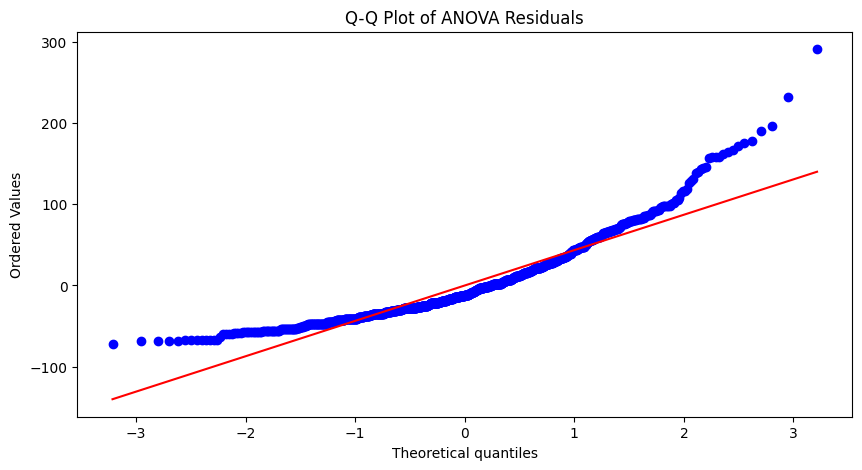

In [ ]:
residuals = model.resid
# Normality check using Q-Q plot
plt.figure(figsize=(10, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of ANOVA Residuals')
plt.show()

In [ ]:
shapiro_test = stats.shapiro(residuals)
shapiro_test

ShapiroResult(statistic=0.8959829211235046, pvalue=3.337903758624965e-26)

In [ ]:
# Homogeneity of variances check using Levene's test
levene_test = stats.levene(df['TOTSPACE'][df['subsidy'] == 'Y'],
                           df['TOTSPACE'][df['subsidy'] == 'N'],
                           center='mean')
levene_test_results = {'Statistic': levene_test[0], 'P-Value': levene_test[1]}
levene_test_results

{'Statistic': 34.91696158750074, 'P-Value': 4.631117240542528e-09}